In [ ]:
# This makes a block diagram from information in the FITS headers

In [ ]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to the directory /fake_fits/ within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish
## once you are ready to run it on your own data

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
import copy
from datetime import datetime
from scipy import ndimage, sqrt, stats
from matplotlib.colors import LogNorm
from pylab import figure, cm
import matplotlib.patches as patches
%matplotlib inline

In [54]:
def bkgdsub(image, method):

    ## ## found the below line; not sure what it was for
    ## ##image[image==0] = numpy.nan

    ctr = int( np.floor( image.shape[0] / 2. ) ) # half-width

    tmpimg = copy.copy(image) # make intermediary image

    # take mean or median across rows (for removing horizontal striping of array)
    if method == 'mean':
        #rowbkgd = stats.nanmean(tmpimg,1) # if deprecated, use 
        rowbkgd = np.nanmean(tmpimg,1)
    elif method == 'median':
        rowbkgd = np.nanmedian(tmpimg,1)
        rowbkgd2d = np.tile(np.reshape(rowbkgd,[len(rowbkgd),1]),[1,image.shape[1]]) # paint this column of median values into a 2048x2048 array
    tmpimg = np.subtract(tmpimg,rowbkgd2d) # simpl

    # do same as above, but for the columns
    if method == 'mean':
        colbkgd = np.nanmean(tmpimg,0)
    elif method == 'median':
        colbkgd = np.nanmedian(tmpimg,0)
        colbkgd2d = np.tile(np.reshape(colbkgd,[1,len(colbkgd)]),[image.shape[0],1])
        image = np.subtract(np.subtract(image,rowbkgd2d),colbkgd2d)

    image[np.isnan(image)] = 0

    # image now should have a nice flat background, but bad pixels will remain
    return image

In [55]:
def processImg(imgDummy, methodDummy):

    # bias level correction
    imgSub = bkgdsub(imgDummy,methodDummy) # simple background smoothing
    imgSub -= np.median(imgSub) # subtract residual background
    imgSubM = ndimage.median_filter(imgSub,3) # smoothed image

    # define BP mask
    imgDiff = np.abs(imgSub - imgSubM) # difference between smoothed and unsmoothed images
    stddev = np.std(imgDiff)
    mask = ( imgDiff > 4*stddev ) & ( imgDiff > 0.15 * np.abs(imgSub) ) # mask: True=bad, False=good

    imgSubBP = copy.copy(imgSub)
    imgSubBP[mask] = imgSubM[mask] # set bad pixels in unsmoothed image equal to those in smoothed image

    return imgSubBP

In [56]:
# stem 

stem = ('/home/../../media/unasemaje/Elements/lbti_data_reduction/190108_ab_aur/raw_data/')

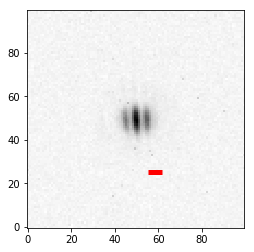

In [87]:
img_string = stem+'lm_190108_'+str("{:0>6d}".format(6776))+'.fits'
sciImg1, header = fits.getdata(img_string,0,header=True)

img_string = stem+'lm_190108_'+str("{:0>6d}".format(7676))+'.fits'
sciImg2, header = fits.getdata(img_string,0,header=True)
    
diff = processImg(sciImg1[1], "median") #np.subtract(sciImg1[1],sciImg2[1])

psf_center = [810,671]

fig,ax = plt.subplots(1)

ax.imshow(diff[psf_center[0]-50:psf_center[0]+50,psf_center[1]-50:psf_center[1]+50], 
           cmap=cm.gray_r, 
           origin="lower")

rect1 = patches.Rectangle((55,25),6.67,0,linewidth=5,edgecolor='r',facecolor='none')

ax.add_patch(rect1)

#ax.colorbar()
plt.savefig('ab_aur_example.pdf')

In [16]:
# read in FITS header data to get filter info
full_table = pd.read_csv('fizeau_altair_180507_metadata.csv')

In [4]:
# sort table by frame number (a few are out of order)

full_table.sort_values(["FRAMENUM"], inplace=True)
full_table = full_table.reset_index(drop=True) # reset indices and don't keep the old ones

In [5]:
# print all keys

for i in range(0,200):
    print full_table.keys()[i] 

Unnamed: 0
ACTEXP
AGE_STOP
BADROWS
BAYXCUR
BAYXREQ
BAYYCUR
BAYYREQ
BITPIX
BSCALE
BZERO
COMMENT
CTLRTEMP
DATAFLAG
DATE-OBS
DETECTOR
DETTEMP
DET_OP
DIMMFLUX
EXPMODE
EXPTIME
EXTEND
FILENAME
FLAG
FPCAZM
FPCAZS
FPCELM
FPCELS
FPCPISTM
FPCPISTS
FRAME
FRAMENUM
GAIN
GROUP
IL_HORIZ
INSTRUME
ITIME
KTCREMOV
LBTTEMP
LBT_AIRM
LBT_ALT
LBT_AZ
LBT_DEC
LBT_LST
LBT_LXOS
LBT_LYOS
LBT_PARA
LBT_RA
LBT_RXOS
LBT_RYOS
LBT_UTC
LCMODES
LGAIN
LLOOPON
LMIRFW25
LMIR_FW1
LMIR_FW2
LMIR_FW3
LMIR_FW4
LOFFSETX
LOFFSETY
LOFFSETZ
LSLNULL
LSTATUS
LTTMODUL
LWCCDBIN
LWCCDFRQ
LWIND1S
MAGWHEEL
NAXIS
NAXIS1
NAXIS2
NCBMDVT
NCOADDS
NDROPS
NGROUPS
NIC_NAC
NIL_NDFW
NIL_OPW
NIL_PRW
NLDCRC
NLMGTLT
NLNCNC
NLPPLTLT
NLWNTRNS
NMCLFSS
NMCMSLD
NOCHAVG
NODPOS
NOMICFW1
NOMICFW2
NOMICLAM
NOMIC_PW
NOUTPUTS
NRAMPS
NREADS
NRESETS
OBJNAME
PCB1X
PCB1Y
PCBRAD
PCCLOSED
PCFJMPS
PCJD
PCLAMB1
PCLAMB2
PCLOOPHZ
PCMSNR1
PCMSNR2
PCPHMCS1
PCPHMCS2
PCPHMEN1
PCPHMEN2
PCPHMSN1
PCPHMSN2
PCPHSTD1
PCPHSTD2
PCPLDG
PCPLIG
PCPLPG
PCPLSP01
PCPLSP1
PCSSPER
PCTIPSP
PCT

IndexError: index 171 is out of bounds for axis 0 with size 171

In [10]:
# print stuff to screen

for t in range(4000,5000):
    print('FRAMENUM: '+str(full_table['FRAMENUM'][t])+
          #'| FW1: '+str(full_table['LMIR_FW1'][t])+
          '| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| ACTEXP: '+str(full_table['ACTEXP'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| FW4: '+str(full_table['LMIR_FW4'][t])+
          '| PA: '+str(full_table['LBT_PARA'][t])+
          '| PCCLOSED: '+str(full_table['PCCLOSED'][t]))

FRAMENUM: 4000| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.800141| PCCLOSED: -99999
FRAMENUM: 4001| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.805936| PCCLOSED: -99999
FRAMENUM: 4002| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.817401| PCCLOSED: -99999
FRAMENUM: 4003| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.873442| PCCLOSED: -99999
FRAMENUM: 4004| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.925899| PCCLOSED: -99999
FRAMENUM: 4005| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.938472| PCCLOSED: -99999
FRAMENUM: 4006| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.943887| PCCLOSED: -99999
FRAMENUM: 4007| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.95489| PCCLOSED: -99999
FRAMENUM: 4008| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.965568| PCCLOSED: -99999
FRAMENUM: 4009| FW3: IFU-prism2.8-4.2| ACTEXP: 1746600| FW4: Open| PA: 11.976557| PCCLOSED: -99999
FRAMENUM: 4

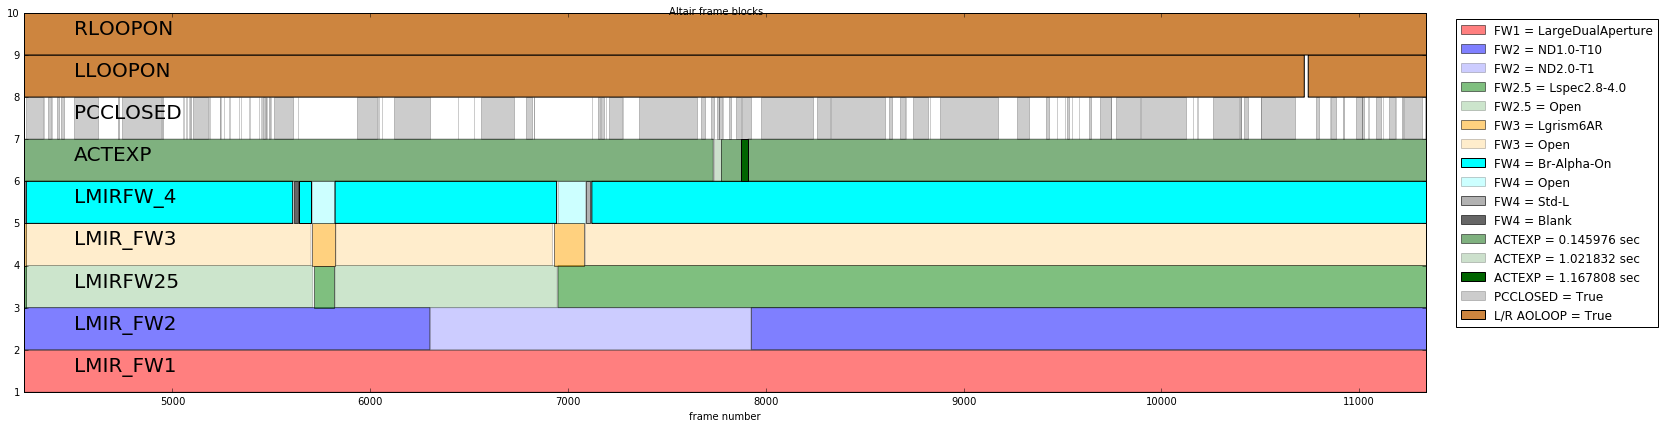

In [77]:
############################################################
# Infomertial: make plot of relevant quantities for classifying the blocks of frames:
# 1. 2 filters
# 2. 3 targets
# 3. 2 nod positions

fig, ax = plt.subplots()
fig.set_size_inches(20,6)


# LMIR FW1
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="94800", \
                facecolor='red', label='FW1 = LargeDualAperture', alpha=0.5)
ax.annotate('LMIR_FW1', xy=(4500, 1.5), size=20, xycoords='data')


# LMIR FW2
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND1.0-T10", \
                facecolor='blue', label='FW2 = ND1.0-T10', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND2.0-T1", \
                facecolor='blue', label='FW2 = ND2.0-T1', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(4500, 2.5), size=20, xycoords='data')


# LMIR FW2.5
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LMIRFW25"]=="Lspec2.8-4.0", \
                facecolor='green', label='FW2.5 = Lspec2.8-4.0', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LMIRFW25"]=="Open", \
                facecolor='green', label='FW2.5 = Open', alpha=0.2)
ax.annotate('LMIRFW25', xy=(4500, 3.5), size=20, xycoords='data')


# LMIR FW3
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Lgrism6AR", \
                facecolor='orange', label='FW3 = Lgrism6AR', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Open", \
                facecolor='orange', label='FW3 = Open', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(4500, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Br-Alpha-On", \
                facecolor='cyan', label='FW4 = Br-Alpha-On', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Open", \
                facecolor='cyan', label='FW4 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Std-L", \
                facecolor='grey', label='FW4 = Std-L', alpha=0.6)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Blank", \
                facecolor='black', label='FW4 = Blank', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(4500, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==145976, \
                facecolor='darkgreen', label='ACTEXP = 0.145976 sec', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==1021832, \
                facecolor='darkgreen', label='ACTEXP = 1.021832 sec', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==1167808, \
                facecolor='darkgreen', label='ACTEXP = 1.167808 sec', alpha=1)
ax.annotate('ACTEXP', xy=(4500, 6.5), size=20, xycoords='data')


# Phase controlled
ax.fill_between(full_table["FRAMENUM"], 7, 8, where=full_table["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(4500, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 8, 9, where=full_table["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(4500, 8.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 9, 10, where=full_table["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')

# test
'''
ax.fill_between(full_table["FRAMENUM"], 10, 11, where=full_table["RWCCDBIN"]==1, \
                facecolor='peru', alpha=1)
#ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')
'''

# target
'''
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="ac her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="AC Her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="hd 167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD166842", facecolor='yellow', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.029252, facecolor='green', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.058504, facecolor='grey', alpha=0.5)
'''

ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))

plt.xlim([4249,11335])
plt.suptitle("Altair frame blocks")
plt.xlabel("frame number")
plt.tight_layout()
#plt.axvline(x=6302) # for checking
plt.savefig("junk.pdf", bbox_inches='tight')
#plt.show()